# Logistic Regression Multiclass Classification

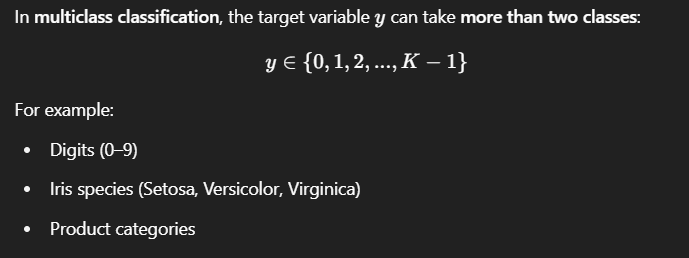

### ❓ Can Logistic Regression Handle It?
Yes ✅ — by extending it using strategies: 

| Method                    | Idea                                                                 |
| ------------------------- | -------------------------------------------------------------------- |
| **One-vs-Rest (OvR)**     | Train 1 classifier per class, treating it as 1 vs all others         |
| **Multinomial (Softmax)** | Train a single model that predicts **probabilities for all classes** |


### 🔢 2. Multinomial Logistic Regression (Softmax Classifier)
- This is the true extension of logistic regression to multiclass problems.

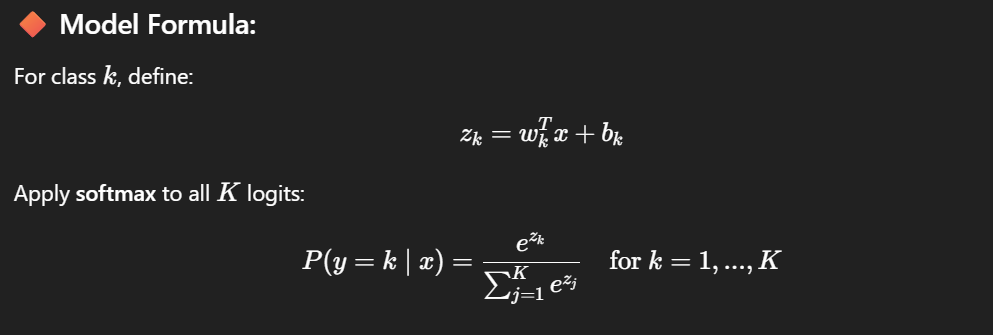
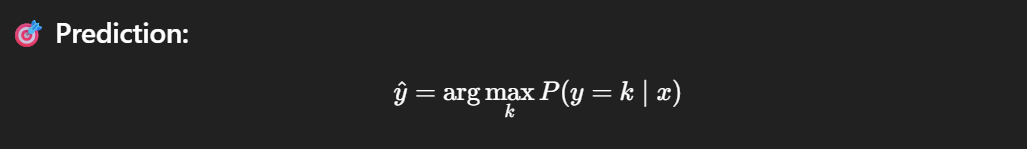

### Loss Function (Categorical Cross-Entropy)

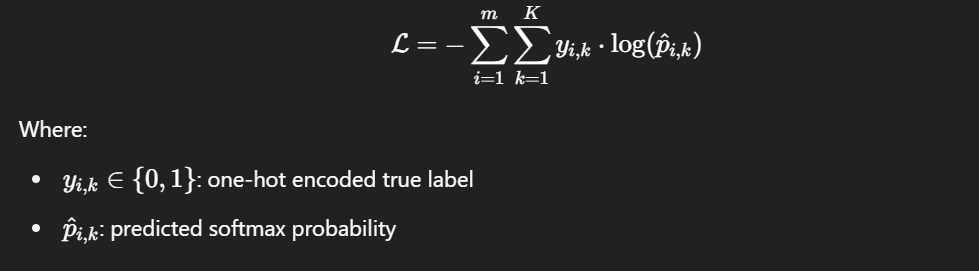

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
X, y = load_iris(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)    # Multinomial uses when we have to use sigmoid function at the place of ove-vs-rest way. (This are hyper-parameter)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(y_pred)

# Score
print(model.score(X_test, y_test)*100)

# Evaluation
print(classification_report(y_test, y_pred))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


---

# One-vs-Rest (OvR) Strategy

Each class is trained against all others:
- 3 classes = 3 classifiers:
- Class 0 vs (1,2)
- Class 1 vs (0,2)
- Class 2 vs (0,1)
- Sklearn does this by default unless multi_class='multinomial'.
```
model = LogisticRegression(multi_class='ovr', solver='lbfgs')
```

In [8]:
# Load data
X, y = load_iris(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train multinomial logistic regression
model = LogisticRegression(multi_class='ovr', solver='lbfgs')   # 'ovr is used when we define the one-vs-rest approch 
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(y_pred)

# Score
print(model.score(X_test, y_test)*100)

# Evaluation
print(classification_report(y_test, y_pred))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
96.66666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
